###  To implement and train a 2-layer Feedforward Neural Network (FNN) 

In [20]:
# Import necessary libraries 
import tensorflow as tf 
from tensorflow.keras import layers, models 
from tensorflow.keras.datasets import mnist 
import matplotlib.pyplot as plt

In [21]:
# Load MNIST dataset 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [22]:
# Preprocess data (normalize the images) 
x_train = x_train.astype('float32') / 255.0 
x_test = x_test.astype('float32') / 255.0 

In [23]:
# Flatten images from 28x28 to 784-dimensional vectors 
x_train = x_train.reshape(x_train.shape[0], 28 * 28) 
x_test = x_test.reshape(x_test.shape[0], 28 * 28)

In [24]:
# Function to build the model with specified activation function 
def build_model(activation_function='relu'):
    model = models.Sequential([
        layers.Dense(128, activation=activation_function, input_shape=(784,)),  # 1st hidden layer
        layers.Dense(10, activation='softmax')  # Output layer (10 classes)
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [25]:
# Train and evaluate model with ReLU activation function 
print("Training model with ReLU activation function...") 
model_relu = build_model('relu') 
history_relu = model_relu.fit(x_train, y_train, epochs=5, batch_size=64, 
validation_data=(x_test, y_test))

Training model with ReLU activation function...
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8625 - loss: 0.5002 - val_accuracy: 0.9557 - val_loss: 0.1532
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9603 - loss: 0.1412 - val_accuracy: 0.9631 - val_loss: 0.1262
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9720 - loss: 0.0948 - val_accuracy: 0.9703 - val_loss: 0.0974
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9788 - loss: 0.0714 - val_accuracy: 0.9733 - val_loss: 0.0885
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9838 - loss: 0.0552 - val_accuracy: 0.9751 - val_loss: 0.0817


In [26]:
# Train and evaluate model with Sigmoid activation function 
print("\nTraining model with Sigmoid activation function...") 
model_sigmoid = build_model('sigmoid') 
history_sigmoid = model_sigmoid.fit(x_train, y_train, epochs=5, batch_size=64, 
validation_data=(x_test, y_test))


Training model with Sigmoid activation function...
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8134 - loss: 0.7747 - val_accuracy: 0.9273 - val_loss: 0.2557
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9295 - loss: 0.2457 - val_accuracy: 0.9451 - val_loss: 0.1922
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9466 - loss: 0.1846 - val_accuracy: 0.9528 - val_loss: 0.1618
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9575 - loss: 0.1500 - val_accuracy: 0.9596 - val_loss: 0.1358
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9653 - loss: 0.1220 - val_accuracy: 0.9650 - val_loss: 0.1204


In [27]:
# Plot accuracy and loss for ReLU vs Sigmoid models 
def plot_history(history, activation_function): 
    plt.plot(history.history['accuracy'], label='Train Accuracy') 
    plt.plot(history.history['val_accuracy'], label='Test Accuracy') 
    plt.title(f'Accuracy - {activation_function} Activation') 
    plt.xlabel('Epochs') 
    plt.ylabel('Accuracy') 
    plt.legend() 
    plt.show() 
    plt.plot(history.history['loss'], label='Train Loss') 
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title(f'Loss - {activation_function} Activation') 
    plt.xlabel('Epochs') 
    plt.ylabel('Loss') 
    plt.legend() 
    plt.show()

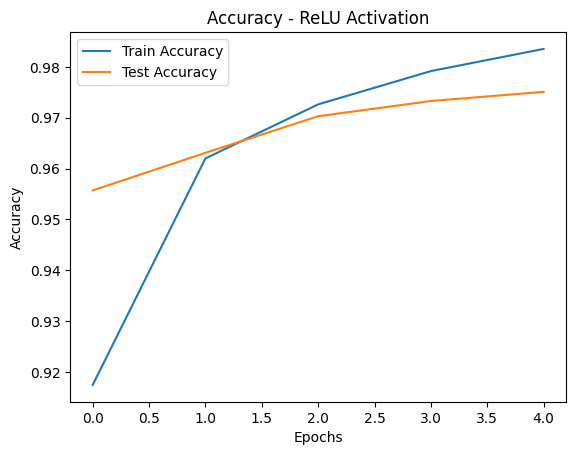

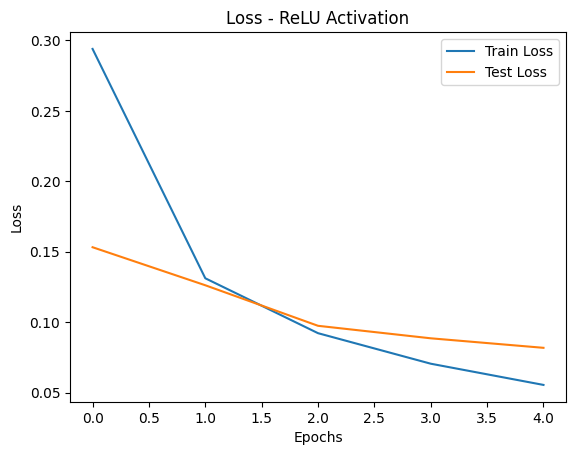

In [28]:
# Plot for ReLU activation function 
plot_history(history_relu, 'ReLU') 

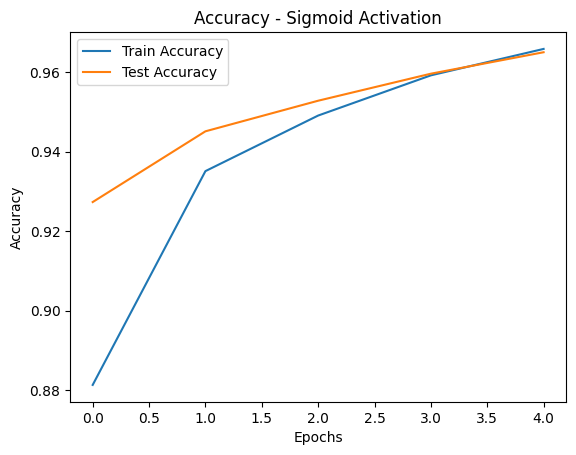

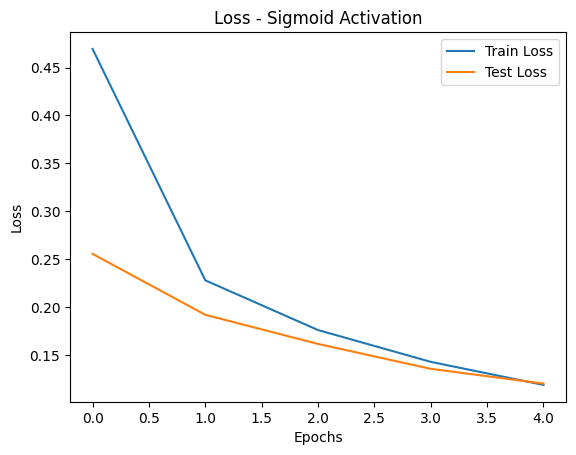

In [29]:
# Plot for Sigmoid activation function 
plot_history(history_sigmoid, 'Sigmoid')

In [30]:
# Evaluate both models 
test_loss_relu, test_acc_relu = model_relu.evaluate(x_test, y_test, verbose=2) 
test_loss_sigmoid, test_acc_sigmoid = model_sigmoid.evaluate(x_test, y_test, verbose=2) 
print(f"Test accuracy with ReLU activation: {test_acc_relu:.4f}") 
print(f"Test accuracy with Sigmoid activation: {test_acc_sigmoid:.4f}")

313/313 - 0s - 2ms/step - accuracy: 0.9751 - loss: 0.0817
313/313 - 0s - 1ms/step - accuracy: 0.9650 - loss: 0.1204
Test accuracy with ReLU activation: 0.9751
Test accuracy with Sigmoid activation: 0.9650
